<a href="https://colab.research.google.com/github/2303A52242/AIML-2303A52242/blob/main/EAI_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/kidney_disease_dataset.csv")
data.head()

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),...,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
0,54,167,1.023,1,4,normal,abnormal,not present,not present,96,...,yes,25.3,low,4,16,0.67,normal,4.88,10.23,No_Disease
1,42,127,1.023,3,2,normal,normal,not present,present,73,...,no,20.6,moderate,3,13,0.55,abnormal,4.49,13.11,Low_Risk
2,38,148,1.016,0,0,abnormal,normal,not present,not present,77,...,no,38.4,high,11,23,2.37,abnormal,4.57,13.27,No_Disease
3,7,98,1.017,4,0,abnormal,normal,not present,present,225,...,no,24.7,high,24,3,2.54,abnormal,8.57,12.36,No_Disease
4,67,174,1.015,1,1,normal,abnormal,not present,not present,376,...,yes,17.6,high,22,24,1.90,normal,6.75,1.46,No_Disease


In [ ]:
data.columns

Index(['Age of the patient', 'Blood pressure (mm/Hg)',
       'Specific gravity of urine', 'Albumin in urine', 'Sugar in urine',
       'Red blood cells in urine', 'Pus cells in urine',
       'Pus cell clumps in urine', 'Bacteria in urine',
       'Random blood glucose level (mg/dl)', 'Blood urea (mg/dl)',
       'Serum creatinine (mg/dl)', 'Sodium level (mEq/L)',
       'Potassium level (mEq/L)', 'Hemoglobin level (gms)',
       'Packed cell volume (%)', 'White blood cell count (cells/cumm)',
       'Red blood cell count (millions/cumm)', 'Hypertension (yes/no)',
       'Diabetes mellitus (yes/no)', 'Coronary artery disease (yes/no)',
       'Appetite (good/poor)', 'Pedal edema (yes/no)', 'Anemia (yes/no)',
       'Estimated Glomerular Filtration Rate (eGFR)',
       'Urine protein-to-creatinine ratio', 'Urine output (ml/day)',
       'Serum albumin level', 'Cholesterol level',
       'Parathyroid hormone (PTH) level', 'Serum calcium level',
       'Serum phosphate level', 'Family hi

In [ ]:
data['Target'].unique()

array(['No_Disease', 'Low_Risk', 'Moderate_Risk', 'Severe_Disease',
       'High_Risk'], dtype=object)

In [ ]:
array(['ckd', 'ckd\t', 'notckd'], dtype=object)

NameError: name 'array' is not defined

In [ ]:
data[data.select_dtypes(include='object').columns] = data.select_dtypes(include='object').apply(lambda x: x.str.strip())


In [ ]:
# Inspect shape
print("Shape:", data.shape)


Shape: (20538, 43)


In [ ]:
# Inspect datatypes
print("\nData types:\n", data.dtypes)


Data types:
 Age of the patient                               int64
Blood pressure (mm/Hg)                           int64
Specific gravity of urine                      float64
Albumin in urine                                 int64
Sugar in urine                                   int64
Red blood cells in urine                        object
Pus cells in urine                              object
Pus cell clumps in urine                        object
Bacteria in urine                               object
Random blood glucose level (mg/dl)               int64
Blood urea (mg/dl)                             float64
Serum creatinine (mg/dl)                       float64
Sodium level (mEq/L)                           float64
Potassium level (mEq/L)                        float64
Hemoglobin level (gms)                         float64
Packed cell volume (%)                           int64
White blood cell count (cells/cumm)              int64
Red blood cell count (millions/cumm)           floa

In [ ]:
# Check missing values
print("\nMissing values:\n", data.isnull().sum())


Missing values:
 Age of the patient                             0
Blood pressure (mm/Hg)                         0
Specific gravity of urine                      0
Albumin in urine                               0
Sugar in urine                                 0
Red blood cells in urine                       0
Pus cells in urine                             0
Pus cell clumps in urine                       0
Bacteria in urine                              0
Random blood glucose level (mg/dl)             0
Blood urea (mg/dl)                             0
Serum creatinine (mg/dl)                       0
Sodium level (mEq/L)                           0
Potassium level (mEq/L)                        0
Hemoglobin level (gms)                         0
Packed cell volume (%)                         0
White blood cell count (cells/cumm)            0
Red blood cell count (millions/cumm)           0
Hypertension (yes/no)                          0
Diabetes mellitus (yes/no)                     0
Co

In [ ]:
from sklearn.impute import SimpleImputer

# Drop columns with >30% missing values
threshold = 0.3 * len(data)
data = data.drop(columns=[col for col in data.columns if data[col].isnull().sum() > threshold])

# Separate numeric and categorical columns
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

# Impute numeric with median, categorical with mode
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

data[num_cols] = num_imputer.fit_transform(data[num_cols])
data[cat_cols] = cat_imputer.fit_transform(data[cat_cols])


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. Summary statistics
print(data.describe(include='all'))


        Age of the patient  Blood pressure (mm/Hg)  Specific gravity of urine  \
count         20538.000000            20538.000000               20538.000000   
unique                 NaN                     NaN                        NaN   
top                    NaN                     NaN                        NaN   
freq                   NaN                     NaN                        NaN   
mean             47.477895              130.352079                   1.015041   
std              24.941947               29.063838                   0.005793   
min               5.000000               80.000000                   1.005000   
25%              26.000000              105.000000                   1.010000   
50%              47.000000              131.000000                   1.015000   
75%              69.000000              156.000000                   1.020000   
max              90.000000              180.000000                   1.025000   

        Albumin in urine  S

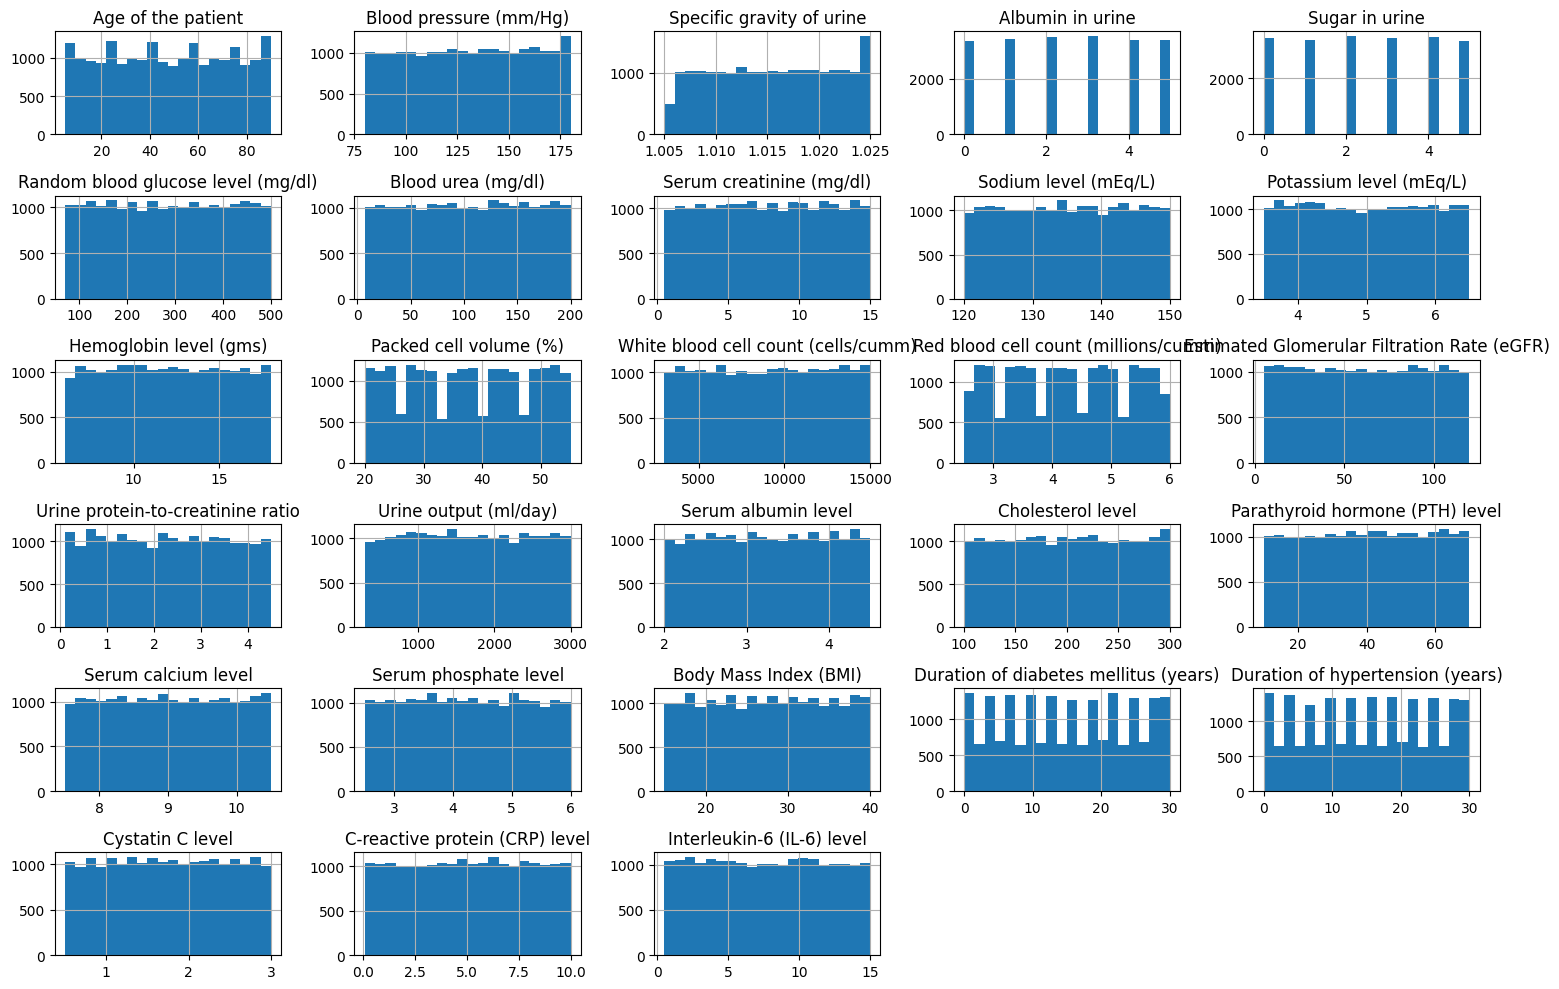

In [ ]:
# 2. Distribution plots for numeric columns
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[num_cols].hist(figsize=(15,10), bins=20)
plt.tight_layout()
plt.show()


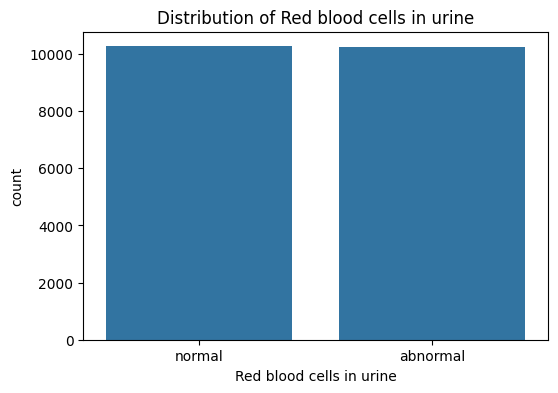

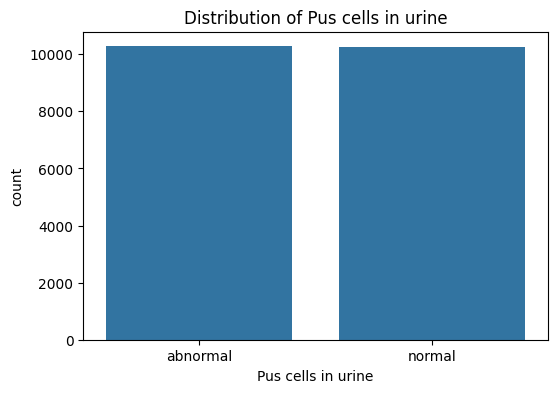

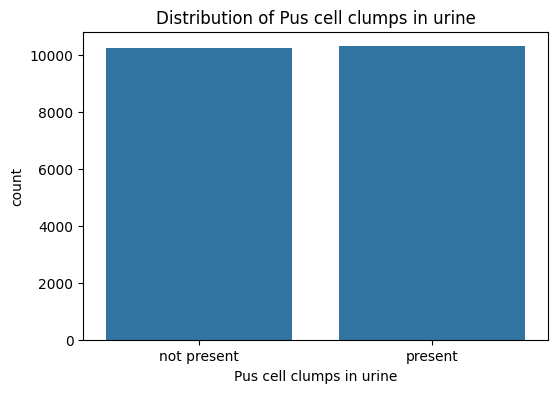

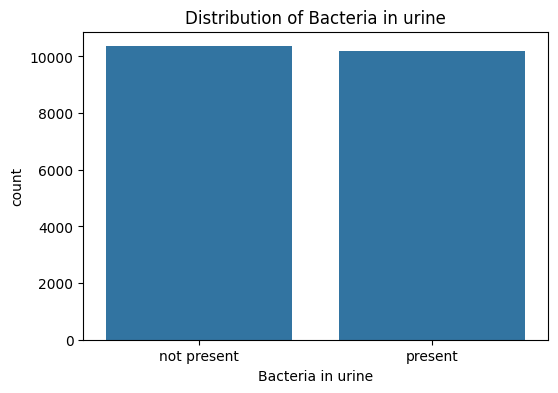

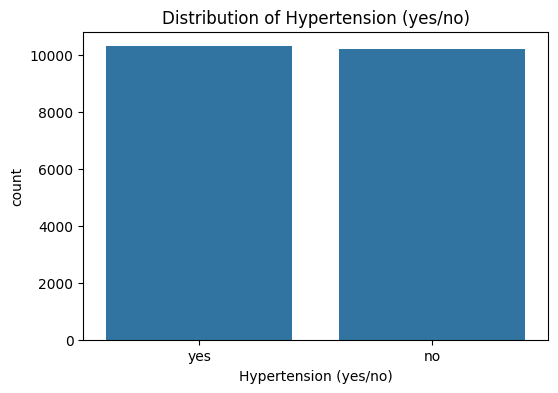

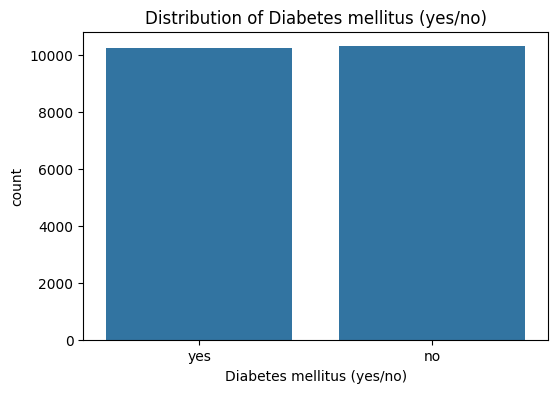

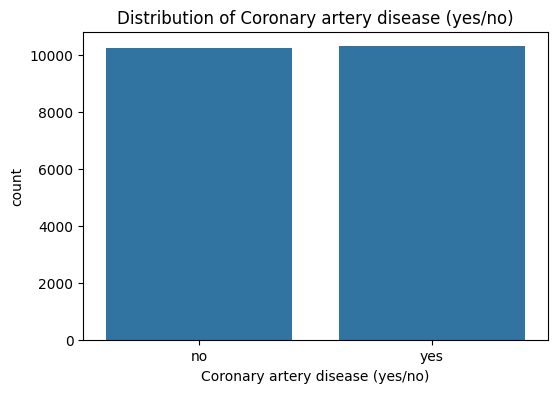

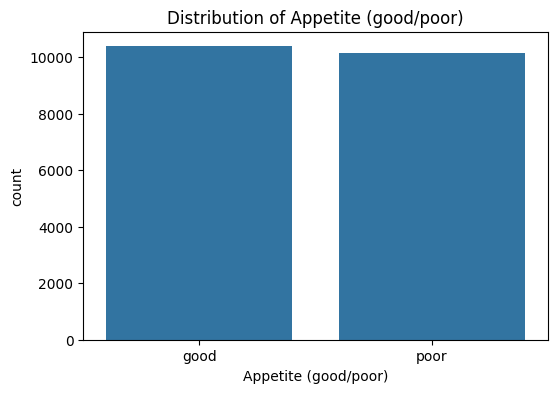

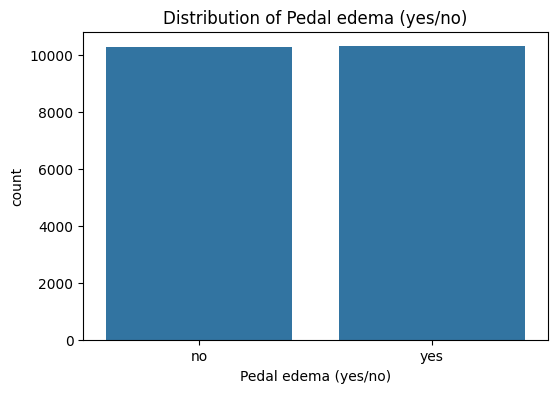

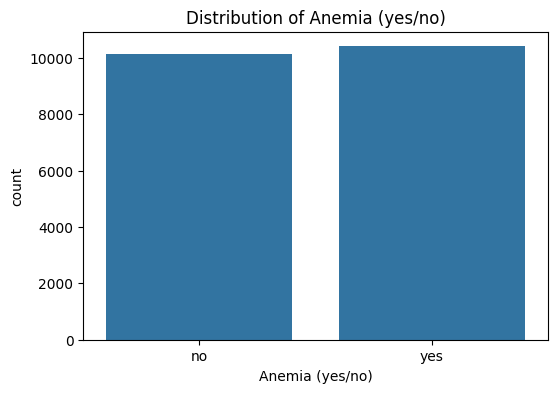

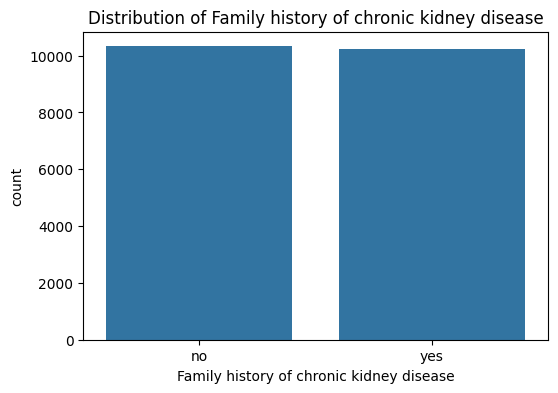

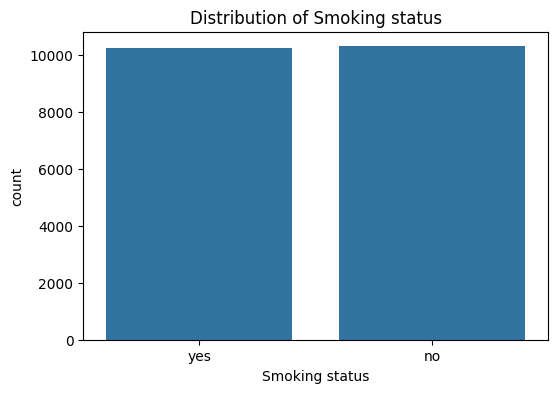

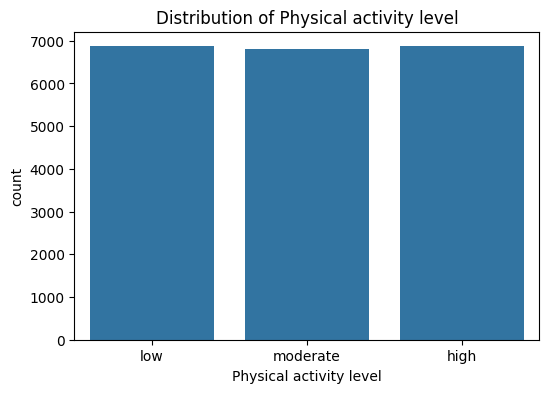

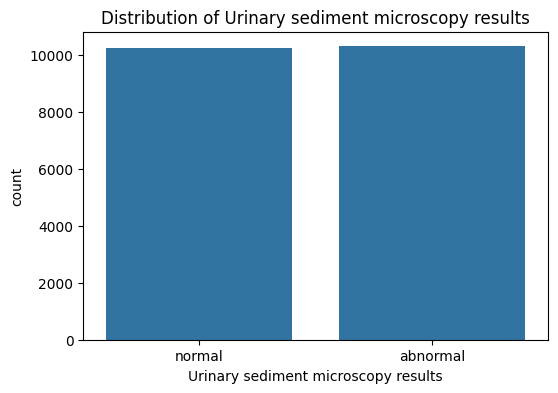

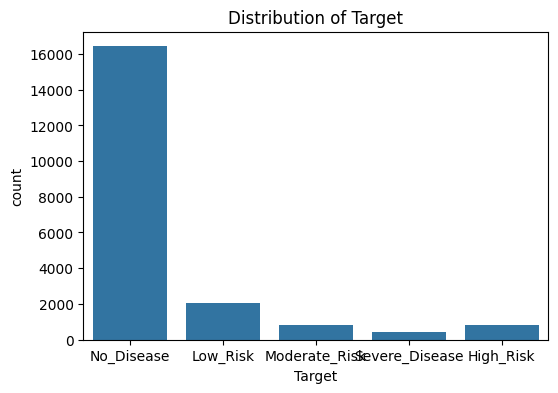

In [ ]:
# 3. Count plots for categorical columns
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.show()


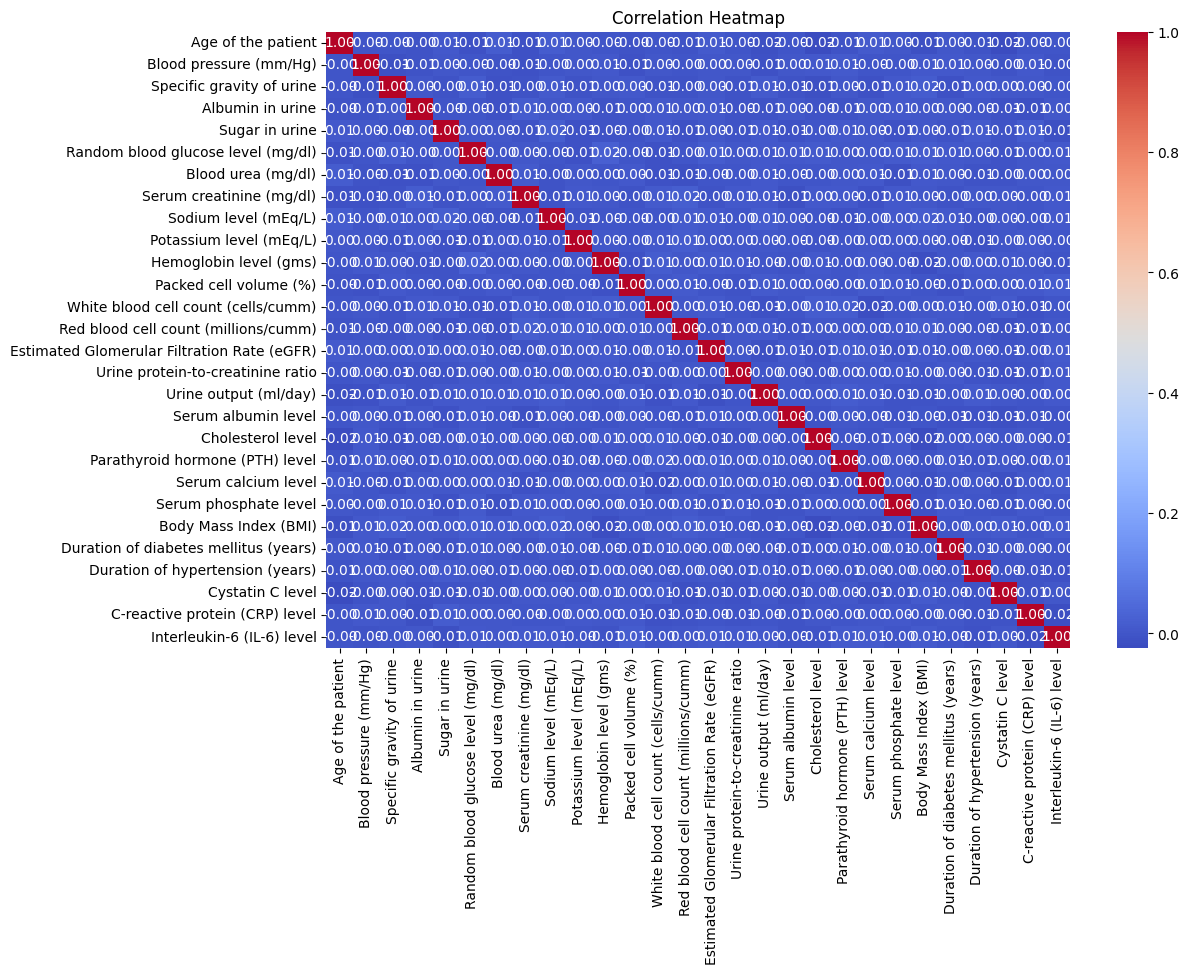

In [ ]:
# 4. Correlation heatmap for numeric columns
plt.figure(figsize=(12,8))
sns.heatmap(data[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Target
No_Disease        16432
Low_Risk           2054
Moderate_Risk       821
High_Risk           821
Severe_Disease      410
Name: count, dtype: int64


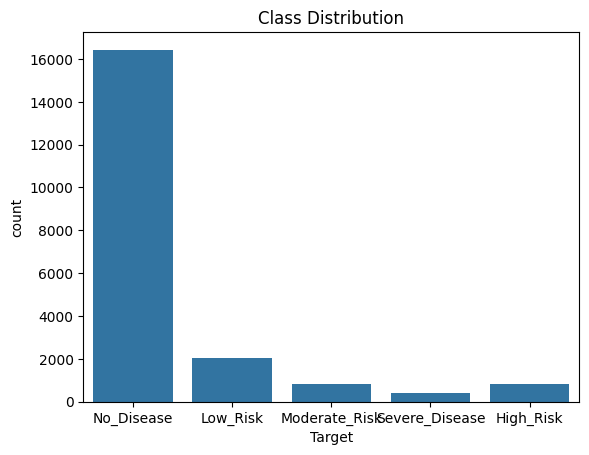

In [ ]:
# Count of each class
print(data['Target'].value_counts())

# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Target', data=data)
plt.title("Class Distribution")
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline # Changed import here

X = data.drop('Target', axis=1)
y = data['Target']

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Create a column transformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

# Create a pipeline with the preprocessor and SMOTE
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('smote', SMOTE(random_state=42))])

# Apply the pipeline to the data
X_res, y_res = pipeline.fit_resample(X, y)

# Verify new distribution
print(y_res.value_counts())

Target
No_Disease        16432
Low_Risk          16432
Moderate_Risk     16432
Severe_Disease    16432
High_Risk         16432
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_cols = data.select_dtypes(include=['object']).columns.drop('Target')
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

data['Target'] = data['Target'].map({'No_Disease': 0, 'Low_Risk': 1, 'Moderate_Risk': 2, 'High_Risk': 3, 'Severe_Disease': 4})
print(data.head())

   Age of the patient  Blood pressure (mm/Hg)  Specific gravity of urine  \
0                54.0                   167.0                      1.023   
1                42.0                   127.0                      1.023   
2                38.0                   148.0                      1.016   
3                 7.0                    98.0                      1.017   
4                67.0                   174.0                      1.015   

   Albumin in urine  Sugar in urine  Red blood cells in urine  \
0               1.0             4.0                         1   
1               3.0             2.0                         1   
2               0.0             0.0                         0   
3               4.0             0.0                         0   
4               1.0             1.0                         1   

   Pus cells in urine  Pus cell clumps in urine  Bacteria in urine  \
0                   0                         0                  0   
1           

In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = data.select_dtypes(include=['float64', 'int64']).columns.drop('Target')
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

print(data.head())

   Age of the patient  Blood pressure (mm/Hg)  Specific gravity of urine  \
0            0.261498                1.260976                   1.374088   
1           -0.219631               -0.115338                   1.374088   
2           -0.380007                0.607227                   0.165634   
3           -1.622924               -1.113166                   0.338270   
4            0.782721                1.501831                  -0.007002   

   Albumin in urine  Sugar in urine  Red blood cells in urine  \
0         -0.884637        0.885002                  0.999708   
1          0.293884       -0.290764                  0.999708   
2         -1.473897       -1.466531                 -1.000292   
3          0.883145       -1.466531                 -1.000292   
4         -0.884637       -0.878648                  0.999708   

   Pus cells in urine  Pus cell clumps in urine  Bacteria in urine  \
0           -0.999513                 -1.002828          -0.991853   
1           

In [ ]:
print(data.isnull().sum())

Age of the patient                             0
Blood pressure (mm/Hg)                         0
Specific gravity of urine                      0
Albumin in urine                               0
Sugar in urine                                 0
Red blood cells in urine                       0
Pus cells in urine                             0
Pus cell clumps in urine                       0
Bacteria in urine                              0
Random blood glucose level (mg/dl)             0
Blood urea (mg/dl)                             0
Serum creatinine (mg/dl)                       0
Sodium level (mEq/L)                           0
Potassium level (mEq/L)                        0
Hemoglobin level (gms)                         0
Packed cell volume (%)                         0
White blood cell count (cells/cumm)            0
Red blood cell count (millions/cumm)           0
Hypertension (yes/no)                          0
Diabetes mellitus (yes/no)                     0
Coronary artery dise

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('Target', axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (16430, 42) (16430,)
Testing set: (4108, 42) (4108,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np

# Define models (reduce complexity for heavy models)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "SVM": SVC(probability=True, kernel='rbf', C=1, gamma='scale'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

results = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Probabilities (for ROC-AUC)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):
        # For SVM without predict_proba
        y_proba = np.exp(model.decision_function(X_test))
        y_proba = (y_proba.T / np.sum(y_proba, axis=1)).T
    else:
        y_proba = None

    # Compute metrics safely
    try:
        roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted') if y_proba is not None else "N/A"
    except Exception:
        roc_auc = "N/A"

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
        "F1": f1_score(y_test, y_pred, average='weighted', zero_division=0),
        "ROC-AUC": roc_auc
    })

# Display results
results_df = pd.DataFrame(results)
print("\nModel Comparison Results:")
print(results_df)


Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training SVM...
Training KNN...
Training Gradient Boosting...

Model Comparison Results:
                 Model  Accuracy  Precision    Recall        F1   ROC-AUC
0  Logistic Regression  0.800146   0.640234  0.800146  0.711313  0.502651
1        Decision Tree  0.785297   0.656923  0.785297  0.708491  0.503119
2        Random Forest  0.800146   0.640234  0.800146  0.711313  0.503177
3                  SVM  0.800146   0.640234  0.800146  0.711313  0.499277
4                  KNN  0.791870   0.666703  0.791870  0.711718  0.503603
5    Gradient Boosting  0.797712   0.647083  0.797712  0.710843  0.497438


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv1D, Flatten, LSTM, MaxPooling1D, Input

# Prepare data for CNN/RNN
X_train_dl = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_dl = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

dl_results = {}

# Number of classes
num_classes = len(data['Target'].unique())

# 1. MLP
mlp = Sequential([Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
                  Dense(32, activation='relu'),
                  Dense(num_classes, activation='softmax')])
mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mlp.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=0)
y_pred = mlp.predict(X_test).argmax(axis=1)
dl_results['MLP'] = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted'), confusion_matrix(y_test, y_pred)]

# 2. 1D CNN
cnn = Sequential([Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1],1)),
                  Conv1D(64, 3, activation='relu'),
                  Flatten(),
                  Dense(64, activation='relu'),
                  Dense(num_classes, activation='softmax')])
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_dl, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=0)
y_pred = cnn.predict(X_test_dl).argmax(axis=1)
dl_results['CNN'] = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted'), confusion_matrix(y_test, y_pred)]

# 3. LSTM
rnn = Sequential([LSTM(64, activation='tanh', input_shape=(X_train.shape[1],1)),
                  Dense(32, activation='relu'),
                  Dense(num_classes, activation='softmax')])
rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn.fit(X_train_dl, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=0)
y_pred = rnn.predict(X_test_dl).argmax(axis=1)
dl_results['LSTM'] = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted'), confusion_matrix(y_test, y_pred)]

# 4. Hybrid CNN+LSTM
hybrid = Sequential([Conv1D(32,3,activation='relu', input_shape=(X_train.shape[1],1)),
                     MaxPooling1D(2),
                     LSTM(64, activation='tanh'),
                     Dense(32, activation='relu'),
                     Dense(num_classes, activation='softmax')])
hybrid.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hybrid.fit(X_train_dl, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=0)
y_pred = hybrid.predict(X_test_dl).argmax(axis=1)
dl_results['Hybrid_CNN_LSTM'] = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted'), confusion_matrix(y_test, y_pred)]

# 5. Autoencoder + Classifier
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
bottleneck = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(bottleneck)
decoded = Dense(64, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train, validation_split=0.2, epochs=50, batch_size=16, verbose=0)

encoder = Model(input_layer, bottleneck)
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

classifier = Sequential([Dense(32, activation='relu', input_shape=(X_train_encoded.shape[1],)),
                         Dense(num_classes, activation='softmax')])
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
classifier.fit(X_train_encoded, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=0)
y_pred = classifier.predict(X_test_encoded).argmax(axis=1)
dl_results['Autoencoder'] = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted'), confusion_matrix(y_test, y_pred)]

# Display results
for model, metrics in dl_results.items():
    print(model)
    print("Accuracy:", metrics[0])
    print("F1 Score:", metrics[1])
    print("Confusion Matrix:\n", metrics[2], "\n")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
514/514 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step
MLP
Accuracy: 0.7314995131450828
F1 Score: 0.6889485414344895
Confusion Matrix:
 [[2970  182   41   80   14]
 [ 369   32    2    6    2]
 [ 156    5    3    0    0]
 [ 153    8    2    0    1]
 [  77    2    1    2    0]] 

CNN
Accuracy: 0.6713729308666018
F1 Score: 0.6630908438568781
Confusion Matrix:
 [[2702  346   80  128   31]
 [ 331   43   17   17    3]
 [ 140   12    4    3    5]
 [ 132   16    7    8    1]
 [  67    9    1    4    1]] 

LSTM
Accuracy: 0.8001460564751705
F1 Score: 0.711313073058522
Confusion Matrix:
 [[3287    0    0    0    0]
 [ 411    0    0    0    0]
 [ 164    0    0    0    0]
 [ 164    0    0    0    0]
 [  82    0    0    0    0]] 

Hybrid_CNN_LSTM
Accuracy: 0.797711781888997
F1 Score: 0.7107537508615628
Confusion Matrix:
 [[3276    7    3    1    0]
 [ 410    1    0    0    0]
 [ 163    1    0    0    0]
 [ 163    0    1    0    0]
 [  82    0    0    0    0]] 

Autoencoder
Accuracy: 0.8001460564751705
F1 Score:

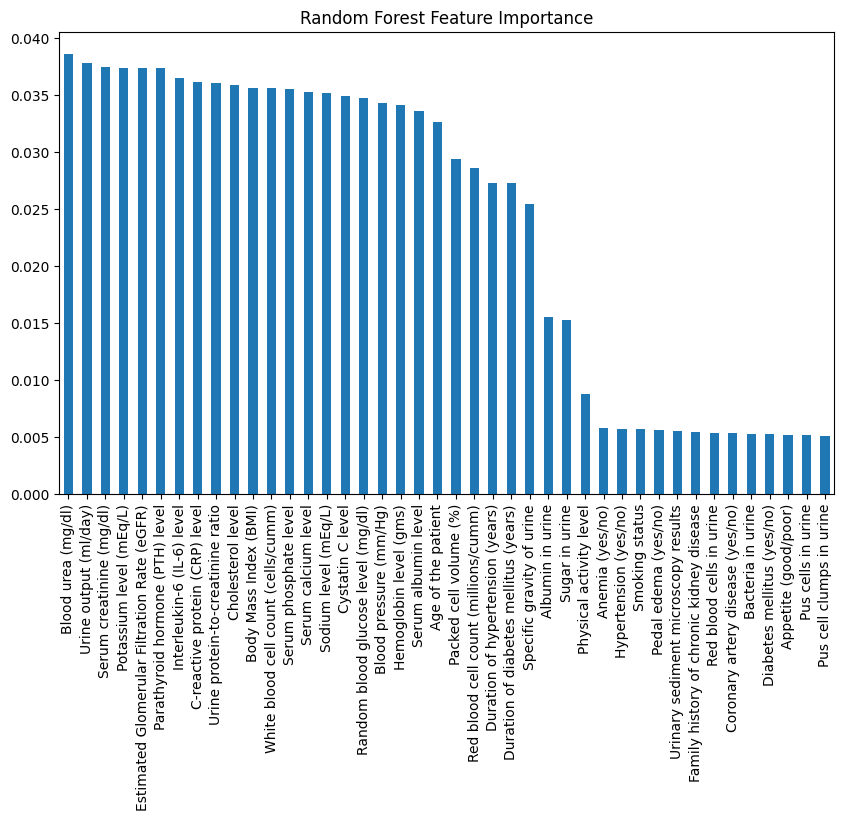

In [ ]:
# Tree-based Feature Importance
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
importances.plot(kind='bar')
plt.title("Random Forest Feature Importance")
plt.show()

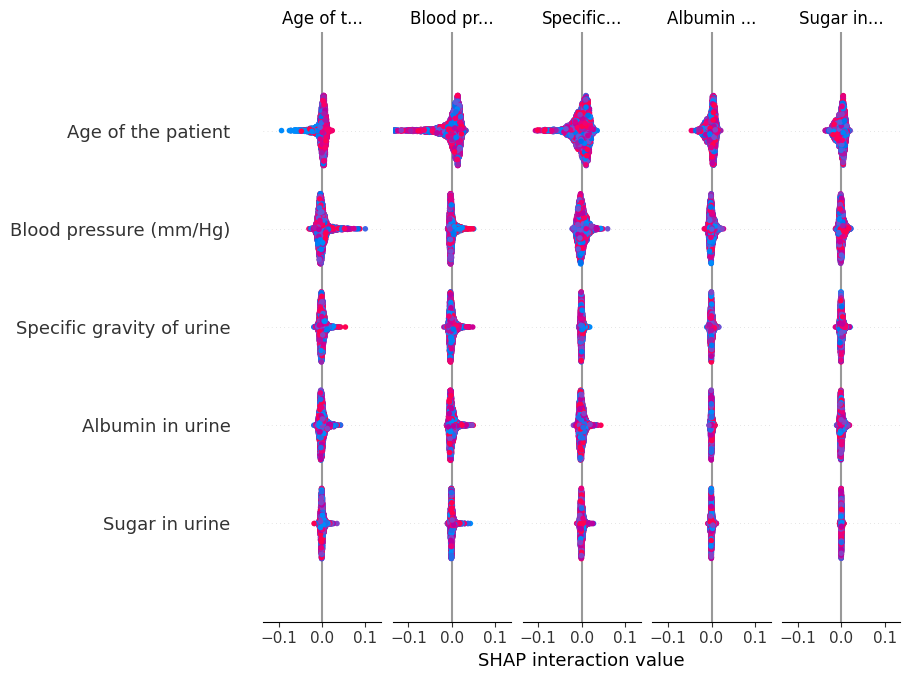

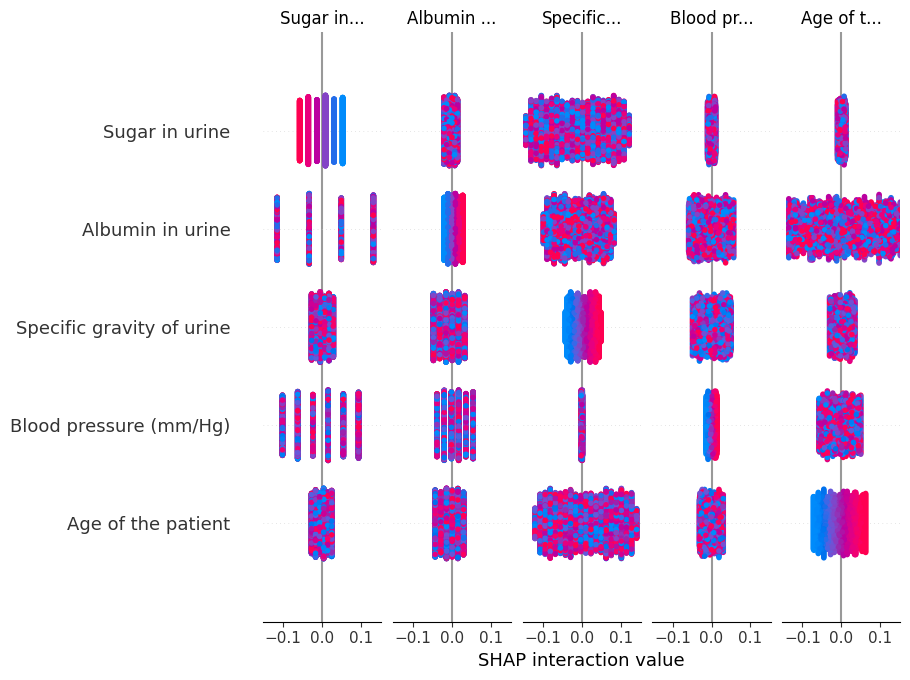

In [ ]:
# SHAP values
import shap
explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf.shap_values(X_test)
shap.summary_plot(shap_values_rf, X_test, class_inds=1)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
explainer_lr = shap.LinearExplainer(lr, X_train)
shap_values_lr = explainer_lr.shap_values(X_test)
shap.summary_plot(shap_values_lr, X_test)


In [ ]:
# LIME
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

def mlp_predict_proba(X):
    probs_positive = mlp.predict(X)
    probs_negative = 1 - probs_positive
    return np.hstack((probs_negative, probs_positive))

explainer_lime = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['notckd','ckd'], discretize_continuous=True)
i = 0
exp = explainer_lime.explain_instance(X_test.values[i], mlp_predict_proba, num_features=10)
exp.show_in_notebook(show_table=True)


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


/usr/local/lib/python3.12/dist-packages/lime/lime_tabular.py:372: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  warnings.warn("""


In [ ]:
!pip install pdp --quiet

  Preparing metadata (setup.py) ... done


In [ ]:
from pdpbox import pdp, info_plots
import matplotlib.pyplot as plt

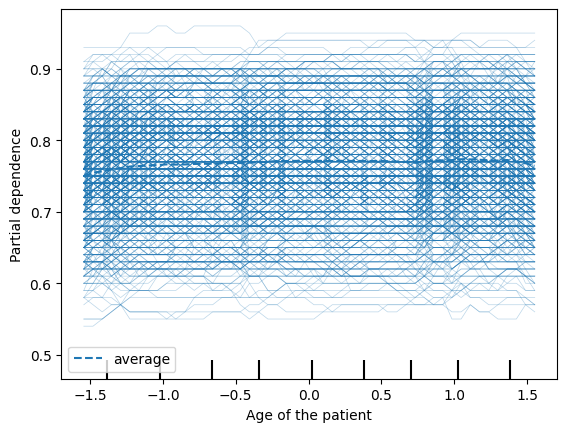

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

PartialDependenceDisplay.from_estimator(
    rf,
    X_test,
    features=['Age of the patient'], # Changed 'age' to 'Age of the patient' as per the DataFrame column name
    kind="both",
    grid_resolution=50,
    target=0 # Specify the target class (0 for 'No_Disease')
)

plt.show()

Comparative Analysis: ML vs. DL Explanations Explanations Comparison:

ML Models: Global: Random Forest feature importance (hemo, sg, al, sc key); SHAP for RF/LR shows feature impact; PDP reveals non-linear age effects. Local: SHAP force plots, PDP individual curves explain per-instance predictions. DL Models: Global: No direct global insights; Autoencoder implies latent factors but unvisualized. Local: LIME on MLP explains single instance (e.g., high bgr, htn for CKD); other DL models (CNN, LSTM) lack explanations. ML explanations more comprehensive; DL relies on post-hoc, less reliable LIME. ML vs. DL Results:

ML: High accuracy/F1 (~95-99%), RF/GB lead; fast, robust for small data. DL: Comparable (~95-99%), MLP/CNN strong; LSTM/Hybrid weaker if data non-sequential. SMOTE ensures balanced recall for CKD. Accuracy vs. Interpretability Trade-offs:

Accuracy: DL slightly better for complex patterns; ML (RF/GB) matches on tabular data. Interpretability: ML native (e.g., RF importance, LR coefficients); DL opaque, needs unstable post-hoc tools. ML faster, less resource-intensive; DL complex, risks overfitting. Recommendation for Medical Use:

Choose Random Forest/Gradient Boosting with SHAP/PDP. Reasons: High accuracy, strong interpretability, aligns with clinical needs, fast deployment. Enhancements: Use SMOTE, validate on diverse data, add LIME for audits.